In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

import scipy.stats as stats
import yfinance as yf

In [3]:
df = pd.read_csv('stock fundamental data.csv')
df.head()
len(df)

50560

In [4]:
df.head(20)

,gvkey,tic,fyear,indfmt,consol,popsrc,datafmt,curcd,act,ap,...,spi,txp,txt,xad,xido,xint,xrd,xsga,costat,mkvalt
0,1004,AIR,2009.0,INDL,C,D,STD,USD,863.429,114.906,...,-4.302,3.263,20.986,NaN,0.000,26.832,NaN,151.904,A,777.8348
1,1004,AIR,2010.0,INDL,C,D,STD,USD,913.985,185.096,...,-1.536,0.000,35.364,NaN,-3.313,30.670,NaN,171.399,A,1049.8206
2,1004,AIR,2011.0,INDL,C,D,STD,USD,1063.272,201.405,...,-13.864,0.000,25.480,NaN,0.000,37.772,NaN,189.397,A,485.2897
3,1004,AIR,2012.0,INDL,C,D,STD,USD,1033.700,149.300,...,-21.100,0.000,26.700,NaN,0.000,41.600,NaN,207.400,A,790.0029
4,1004,AIR,2013.0,INDL,C,D,STD,USD,1116.900,171.100,...,0.000,0.000,32.100,NaN,0.000,42.000,NaN,197.600,A,961.3080
5,1004,AIR,2014.0,INDL,C,D,STD,USD,954.100,142.300,...,-48.400,0.000,-28.500,NaN,64.700,26.500,NaN,167.900,A,1046.3954
6,1004,AIR,2015.0,INDL,C,D,STD,USD,873.100,163.400,...,-0.400,1.100,18.800,NaN,7.200,6.400,NaN,170.800,A,842.5112
7,1004,AIR,2016.0,INDL,C,D,STD,USD,888.500,177.400,...,2.600,12.300,24.100,NaN,6.300,5.500,NaN,196.700,A,1200.3288
8,1004,AIR,2017.0,INDL,C,D,STD,USD,942.700,170.000,...,0.000,0.000,3.500,NaN,-58.100,8.000,NaN,208.600,A,1551.4580
9,1004,AIR,2018.0,INDL,C,D,STD,USD,952.500,187.800,...,-12.400,0.000,4.900,NaN,-76.600,9.500,NaN,218.800,A,1046.7709


# Preprocessing data


In [5]:
# check for any null values in market value 
df.isnull().sum()

gvkey          0
tic            0
fyear         51
indfmt         0
consol         0
popsrc         0
datafmt        0
curcd         51
act        21788
ap         10863
at          6722
ceq         6843
che        13777
cogs       13868
dlc         7086
dlcch      31465
dltt        6884
dp          9347
dvc         7149
ib          6821
intan       7427
invt       12160
ivao       15275
lct        21720
lt          6792
nopio      17628
ppent       8714
rect       14032
sale       13865
spi         7300
txp        15200
txt         6826
xad        35615
xido        6821
xint       12512
xrd        31021
xsga       19673
costat         0
mkvalt     14697
dtype: int64

In [6]:
#create column 'future mkvalt' that holds the market value of the next year
condition1 = df['tic'].shift(-1) == df['tic']
condition2 = df['fyear'].shift(-1) == df['fyear'] + 1
df['future_mkvalt'] = np.where(condition1 & condition2, df['mkvalt'].shift(-1), np.nan)

#drop nulls
df = df.dropna(subset=['mkvalt', 'future_mkvalt'], how='all')

#percent change is the percent change in market value from one year to the next
df['percent_change'] = (df['future_mkvalt']-df['mkvalt'])/df['mkvalt']

#if percent change is greater than 20%, classify as undervalued
df['undervalued'] = (df['percent_change'] > 0.10)

In [7]:
#fill null expenses with 0
df['xrd'] = df['xrd'].fillna(0)
df['xad'] = df['xad'].fillna(0)
df['xsga'] = df['xsga'].fillna(0)
df['xint'] = df['xint'].fillna(0)
df['dlcch'] = df['dlcch'].fillna(0)



#combine all expenses columns into one column
expenses_list = ['xrd', 'xad', 'xsga', 'xint', 'nopio', 'cogs']
df['expenses'] = df[expenses_list].sum(axis=1)

df = df.drop(columns=expenses_list)

#delete duplicate rows due to formatting
condition = df['indfmt'] != "FS"
df = df[condition]

#drop unneccessary columns
df = df.drop(columns=['indfmt', 'consol', 'popsrc', 'datafmt', 'curcd', 'gvkey', 'costat'])




In [8]:
df.isnull().sum()

tic                  0
fyear                0
act               7179
ap                 277
at                  98
ceq                154
che                 99
dlc                102
dlcch                0
dltt               231
dp                1619
dvc                251
ib                 158
intan              538
invt               459
ivao              1468
lct               7119
lt                 148
ppent             1258
rect               309
sale               157
spi                525
txp               4285
txt                163
xido               159
mkvalt            1742
future_mkvalt     4277
percent_change    6019
undervalued          0
expenses             0
dtype: int64

In [9]:
#remove rows with null values
condition = df.isnull().sum(axis=1) < 1
df = df[condition]

In [10]:
df.head(20)

,tic,fyear,act,ap,at,ceq,che,dlc,dlcch,dltt,...,sale,spi,txp,txt,xido,mkvalt,future_mkvalt,percent_change,undervalued,expenses
0,AIR,2009.0,863.429,114.906,1501.042,746.906,79.370,100.833,-4.996,336.191,...,1352.151,-4.302,3.263,20.986,0.000,777.8348,1049.8206,0.349670,True,1243.600
1,AIR,2010.0,913.985,185.096,1703.727,835.845,57.433,114.075,54.991,329.802,...,1775.782,-1.536,0.000,35.364,-3.313,1049.8206,485.2897,-0.537740,False,1613.484
2,AIR,2011.0,1063.272,201.405,2195.653,864.649,67.720,122.865,0.000,669.489,...,2074.498,-13.864,0.000,25.480,0.000,485.2897,790.0029,0.627900,True,1891.119
3,AIR,2012.0,1033.700,149.300,2136.900,918.600,75.300,86.400,0.000,622.200,...,2167.100,-21.100,0.000,26.700,0.000,790.0029,961.3080,0.216841,True,1970.300
4,AIR,2013.0,1116.900,171.100,2199.500,999.500,89.200,69.700,10.000,564.300,...,2035.000,0.000,0.000,32.100,0.000,961.3080,1046.3954,0.088512,False,1824.100
5,AIR,2014.0,954.100,142.300,1515.000,845.100,54.700,69.000,-80.000,85.000,...,1594.300,-48.400,0.000,-28.500,64.700,1046.3954,842.5112,-0.194844,False,1537.300
6,AIR,2015.0,873.100,163.400,1442.100,865.800,31.200,12.000,60.000,136.100,...,1662.600,-0.400,1.100,18.800,7.200,842.5112,1200.3288,0.424704,True,1531.800
7,AIR,2016.0,888.500,177.400,1504.100,914.200,10.300,2.000,21.000,155.300,...,1767.600,2.600,12.300,24.100,6.300,1200.3288,1551.4580,0.292528,True,1624.700
8,AIR,2017.0,942.700,170.000,1524.700,936.300,41.600,0.000,-1.000,177.200,...,1748.300,0.000,0.000,3.500,-58.100,1551.4580,1046.7709,-0.325299,False,1628.900
11,AAL,2011.0,6757.000,1007.000,23848.000,-7111.000,4739.000,1518.000,0.000,6702.000,...,24022.000,-886.000,0.000,0.000,0.000,117.3438,266.5571,1.271591,True,24332.000


In [11]:
# check for any null values
df.isnull().sum()

tic               0
fyear             0
act               0
ap                0
at                0
ceq               0
che               0
dlc               0
dlcch             0
dltt              0
dp                0
dvc               0
ib                0
intan             0
invt              0
ivao              0
lct               0
lt                0
ppent             0
rect              0
sale              0
spi               0
txp               0
txt               0
xido              0
mkvalt            0
future_mkvalt     0
percent_change    0
undervalued       0
expenses          0
dtype: int64

In [12]:
# new length of df after processing
len(df)

18538

# remove outliers

Text(0.5, 0, 'Percent Increase in market value over 1 year period')

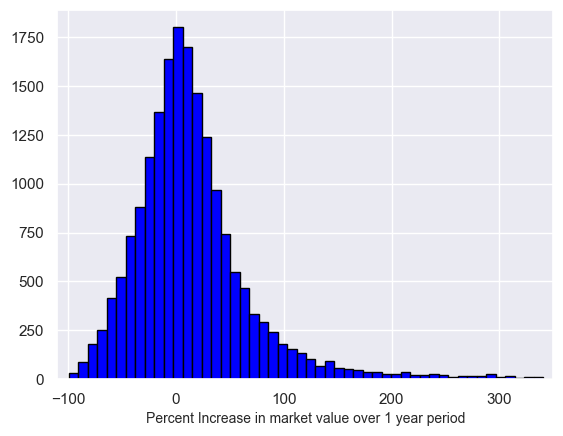

In [13]:
binwidth=0.1
    
# Set up the plot
plot = plt.subplot(1, 1, 1 )
    
# Draw the plot
plot.hist(df['percent_change']*100, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
plt.xlim(-110, 350)
plot.set_xlabel('Percent Increase in market value over 1 year period', size = 10)

In [14]:
#remove outliers
condition1 = df['percent_change'] < 1
df = df[condition1]

Text(0.5, 0, 'Percent Increase in market value over 1 year period')

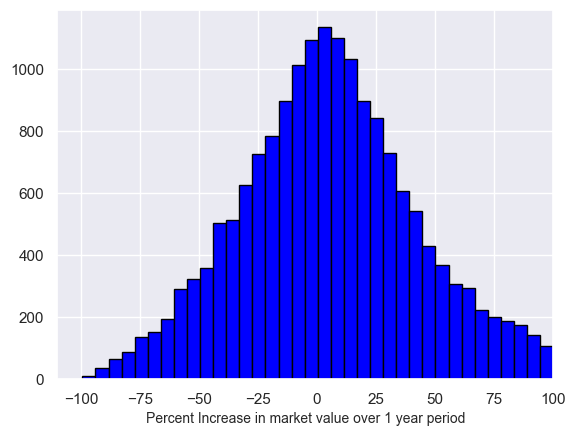

In [15]:
#replot
binwidth=5
    
# Set up the plot
plot = plt.subplot(1, 1, 1 )
plot.hist(df['percent_change']*100, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
#Title and labels
plt.xlim(-110, 100)
plot.set_xlabel('Percent Increase in market value over 1 year period', size = 10)

# Feature engineering

In [16]:
#feature selection 
from sklearn.feature_selection import SelectKBest, f_classif,f_regression

#features and predict value
df = df.rename(columns={'act':'Total Current Assets', 'at':'Total Assets', 'che':'Cash', 'dltt':'Long Term Debt',
                        'intan':'Intangible Assets', 'lct':'Total Current Liabilities', 'lt':'Total Liab', 'rect':'Net Receivables',
       'mkvalt':'Market Value'})
Features = list(df.drop(columns=['tic','fyear','undervalued','percent_change','future_mkvalt','spi']).columns)
X = df[Features]
y = df['undervalued']

# find best features 
fs = SelectKBest(score_func=f_classif, k=9)

X_selected = fs.fit_transform(X,y)

In [17]:
# best features according to pearson test 
selected_features = fs.get_feature_names_out()
X = df[selected_features]
selected_features

array(['Total Current Assets', 'Total Assets', 'Cash', 'Long Term Debt',
       'Intangible Assets', 'Total Current Liabilities', 'Total Liab',
       'Net Receivables', 'Market Value'], dtype=object)

In [18]:
X = X.sort_index(axis = 1)

# Test Webscraper and Scaling

Two different functions
- scrape_os_and_calculate_mkvalt(ticker)
    - function that scrapes most recent fiscal year ordinary shares data from yahoo and uses yfinance api to get the closing stock price on that day. this is used to calculate the market value of the fiscal year 
    - params = ticker(String representing Ticker of a company)
    - returns the marketvalue and the Ticker Object 
- clean_balance_sheet_for_feautures(msft, marketvalue)
    - function that uses the msft object to get the companies balance sheet it then removes the indexes that we dont need for features. It then takes the current year's data and divides it by 100,000 to get it to be represented in millions to match the data input that the model was trained on. If a company has data which is missing (ie. intangible assets for apple) it sets the number to be 0. it then adds the market value to the dictionary 
    - params = msft (Ticker object created by scrape_os), marketvalue (marketValue returned from scrape_os)
    - returns a dictionary containing company's financial data

In [19]:
import requests
from bs4 import BeautifulSoup

def scrape_os_and_calulate_mkvalt(ticker):
    ticker = ticker.upper()
    try: 
        msft = yf.Ticker(ticker)
    except:
        print("The Ticker May be Delisted. Please check if the Ticker exists and make sure to enter correctly")
    scrape_url = 'https://finance.yahoo.com/quote'
    ticker_url = "{}/{}".format(scrape_url, ticker) +'/balance-sheet?p='+ ticker
    
    headers={'User-Agent': 'Custom'}

    response = requests.get(ticker_url,headers=headers )
    
    html = response.content
    soup = BeautifulSoup(html)
    
    ordinary_shares = soup.find(title = "Ordinary Shares Number")
    date = soup.find(class_='D(tbhg)').text
    if len(date) == 49:
        fyear_end_date = date[15:19] + "-" + date[9:11] + "-" + date[12:14]
    else:
        fyear_end_date = date[14:18] + "-" + date[9:10] + "-" + date[11:13]
    
    shares = []
    for i in ordinary_shares.parent.next_siblings:
        number = i.text.replace(",",'')
        shares.append(int(number))
    
    most_current_fyear_ordinary_shares = shares[0] / 100 
    
    j = msft.history(start = fyear_end_date)
    closing_price = j.Close.iloc[0]
    marketvalue = closing_price * most_current_fyear_ordinary_shares
    
    return [marketvalue, msft]
    

In [20]:
def clean_balance_sheet_for_feautures(msft, marketvalue):
    balanceSheet = msft.balance_sheet
    
    dict_index_needed = {'Intangible Assets':1 ,'Total Liab': 2,'Total Assets':3,'Cash':4,'Total Current Liabilities':5,
           'Total Current Assets':6,'Net Receivables':7,'Long Term Debt':8}
     
    index = balanceSheet.index.to_list()
    
    for i in range(len(index) - 1, -1, -1):
        if index[i] in dict_index_needed:
            index.pop(i)
        
    balanceSheet.drop(index = index, inplace = True)
    
    first_col = balanceSheet.columns[0]
    
    current_numbers_needed = balanceSheet[first_col]
    current_numbers_needed = current_numbers_needed.to_dict()
    
#     convert numbers to be in millions 
    for key in current_numbers_needed:
        current_numbers_needed[key] = current_numbers_needed[key] / 100000

        
    current_numbers_needed["Market Value"] = marketvalue
# check to see that dict has every value and key needed for features 
    for key in dict_index_needed.keys():
        if key not in current_numbers_needed:
            current_numbers_needed[key] = 0
    return current_numbers_needed

# Visualization Functions

In [21]:

""" 
These are the labels for what you can choose from the data to visualize for the web scraper 
'Total Current Assets', 'Total Assets', 'Cash', 'Long Term Debt', 'Intangible Assets', 
'Total Current Liabilities', 'Total Liab', 'Net Receivables', 'Market Value']

maybe you can create a function that uses the webscraper to get to different companies financial data from the past
year and compares them to each other. 

so lets say apple and samsung 

you would first call scrape_os with apple ticker and samsung ticker.

aaplemarketval, applemsft = scrape_os 
samsungmarket, samsungmsft = scrap_os 

then you would call clean balance sheet which returns a dictionary

aapleFdata = cleanbalance(aaplemsft,applemarket)
samsungFdat = cleanbalance(samsmsf, samsmarketval)

after you get those two dictionaries add this pd.DataFrame([dict]) where dict is the companys financial dict, this 
converts it to a dataframe.

then you can call some plotting functions using sns or matplot lib. 

template for your function

def visualize_two_companies(company_ticker1,companyticker2):
        # scrape the companys ordinary shares and calculate the marketvalue
        company1marketval, company1msft = scrape_os_and_calulate_mkvalt(company_ticker1)
        company2marketval, company2msft = scrape_os_and_calulate_mkvalt(company_ticker2)
        
        # get a dictinoray with all the features 
        company1Fdata = clean_balance_sheet_for_feautures(company1msft,company1marketval)
        company2Fdata = clean_balance_sheet_for_feautures(company2msft,company2marketval)
        
        company1FdataDF = pd.DataFrame([company1Fdata])
        company2FdataDF = pd.DataFrame([company2Fdata])
        
        #the rest you can do for this function
"""     


" \nThese are the labels for what you can choose from the data to visualize for the web scraper \n'Total Current Assets', 'Total Assets', 'Cash', 'Long Term Debt', 'Intangible Assets', \n'Total Current Liabilities', 'Total Liab', 'Net Receivables', 'Market Value']\n\nmaybe you can create a function that uses the webscraper to get to different companies financial data from the past\nyear and compares them to each other. \n\nso lets say apple and samsung \n\nyou would first call scrape_os with apple ticker and samsung ticker.\n\naaplemarketval, applemsft = scrape_os \nsamsungmarket, samsungmsft = scrap_os \n\nthen you would call clean balance sheet which returns a dictionary\n\naapleFdata = cleanbalance(aaplemsft,applemarket)\nsamsungFdat = cleanbalance(samsmsf, samsmarketval)\n\nafter you get those two dictionaries add this pd.DataFrame([dict]) where dict is the companys financial dict, this \nconverts it to a dataframe.\n\nthen you can call some plotting functions using sns or matplot 

In [ ]:
"""
I would recommend searching online ways to visualize financial data see if you can add a visual that uses yfinance
to scrape a years worth of data for the major Stock Index Funds (Like nasdaq, S&p, Dow Jones) and see how they compare
to each other 

you will need to look up yfinance api (you can use it to download multiple ticker data at once)
you will also need to look up how you should visualize stock data to tell the best story (or something like that)

"""

nguyen i commented two different visualization functions that i think would be really cool! Thank you for doing this. if you get stuck on something or dont understand how my code works just let me know and I will help you out. 
for the second function i didnt explain it as in depth as the first one, so if you have a question just let me know. also the ta should be able to help as well! Cant wait to see what you create!!!

# Functions for model evaluation and building 

In [22]:
# build pipline which evaluates models 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def build_and_eval_classification_model(model,X,y):
    
    print("running model report",model)
    X_train = X.iloc[3800:]
    X_test = X.iloc[:3800]
    y_train = y.iloc[3800:]
    y_test = y.iloc[:3800]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled,y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test,y_pred)
    print("\nAccuracy Score: %f" % accuracy)

    precision = precision_score(y_test,y_pred)
    print("Precision Score: %f" % precision)

    recall = recall_score(y_test,y_pred)
    print("Recall Score: %f" % recall)

    f1 = f1_score(y_test,y_pred)
    print('F1 Score: %f' % f1)

    # Calculate predicted probabilities
    y_pred_proba = model.predict_proba(X_test)

    # Keep only the proba for True
    y_pred_proba = y_pred_proba[:,1]

    # Compute auc score
    auc = roc_auc_score(y_true = y_test, y_score = y_pred_proba )
    print('AUC Score: %f' % auc)
    
    return y_pred

In [23]:
# choose model and hyperparameters then run a grids search to find best paramaters
X_train = X.iloc[3800:]
X_test = X.iloc[:3800]
y_train = y.iloc[3800:]
y_test = y.iloc[:3800]

scaler = StandardScaler()



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# find the total return if you would invest in certain companies 
def find_return(model,y_test,undervalued_y_pred):
    undervalued_y_pred = undervalued_y_pred.tolist()
    gains = 0
    investment = 0
    arr = y_test.index
    len(arr)
    for i in range(len(undervalued_y_pred)):
        if(undervalued_y_pred[i]):
            index = arr[i]
            investment = investment + 100
            change = 100  + 100 * (df.loc[[index]]['percent_change'].values)
            gains = gains + change
            
#     convert gains to list so we can remove the value for formatting
    if model != DecisionTreeClassifier():
        gains = gains.tolist()
        gains = gains[0]
    
    
    percent_increase = (gains - investment)/investment      
    print("\nreturn for model",model)
    print('Initial Investment: ${investment: .2f}'.format(investment = investment))
    print('Total Return: ${gains: .2f}' .format(gains=gains))
    print('Percent increase: {percent_increase: .2f}'.format(percent_increase= percent_increase))  
   

# Build and Evaluate classification models 

models prediction is evaluated. We then run the find return function to find what your gains would be if you would invest in the stocks that our model predicted as undervalued 

In [25]:
# random forest test and returns 
rf = rf = RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=10,
                           min_samples_split=10, n_estimators=100)

# evaluate model 
y_pred_rf = build_and_eval_classification_model(rf,X,y)

# find returns 
find_return(rf,y_test,y_pred_rf)

running model report RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=10,
                       min_samples_split=10)

Accuracy Score: 0.546579
Precision Score: 0.487047
Recall Score: 0.054715
F1 Score: 0.098378
AUC Score: 0.499471

return for model RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=10,
                       min_samples_split=10)
Initial Investment: $ 19300.00
Total Return: $ 21453.87
Percent increase:  0.11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [26]:
# logistic regression test and returns 
lr = LogisticRegression()

# evaluate model 
y_pred_lr = build_and_eval_classification_model(lr,X,y)

# find returns 
find_return(lr,y_test,y_pred_lr)

running model report LogisticRegression()

Accuracy Score: 0.539474
Precision Score: 0.444828
Recall Score: 0.075087
F1 Score: 0.128486
AUC Score: 0.482367

return for model LogisticRegression()
Initial Investment: $ 29000.00
Total Return: $ 31268.62
Percent increase:  0.08


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [27]:
# k nearest test and returns 
k = 135
knclas = KNeighborsClassifier(n_neighbors= k)



# test conversion
y_pred_kn = build_and_eval_classification_model(knclas,X,y)

# find returns 
find_return(knclas,y_test,y_pred_kn)

running model report KNeighborsClassifier(n_neighbors=135)

Accuracy Score: 0.545263
Precision Score: 0.493421
Recall Score: 0.218277
F1 Score: 0.302663
AUC Score: 0.482911

return for model KNeighborsClassifier(n_neighbors=135)
Initial Investment: $ 76000.00
Total Return: $ 84324.38
Percent increase:  0.11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [28]:
# decision tree test and returns 
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=2,
                       min_samples_leaf=5, min_samples_split=12)

# evaluate model  
y_pred_dt = build_and_eval_classification_model(dt,X,y)

# find returns 
find_return(dt,y_test,y_pred_dt)

running model report DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=2,
                       min_samples_leaf=5, min_samples_split=12)

Accuracy Score: 0.528947
Precision Score: 0.432075
Recall Score: 0.133295
F1 Score: 0.203737
AUC Score: 0.496237

return for model DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=2,
                       min_samples_leaf=5, min_samples_split=12)
Initial Investment: $ 53000.00
Total Return: $ 56679.51
Percent increase:  0.07


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [29]:
my_dict = {'feature_importance': rf.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.307293,Total Assets
3,0.188790,Long Term Debt
0,0.116749,Total Current Assets
6,0.098993,Total Liab
4,0.095492,Intangible Assets
5,0.066262,Total Current Liabilities
7,0.051702,Net Receivables
8,0.039581,Market Value
2,0.035136,Cash
